In [2]:
import xarray as xr

# Charger ton fichier NetCDF
ds = xr.open_dataset("../data/sst/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1743863918883.nc")

# Afficher les variables disponibles dans le dataset
print(ds)

# Pour accéder à une variable spécifique, comme la température
# temperature = ds['temperature_variable']  # Remplace 'temperature_variable' par le nom réel de la variable
# print(temperature)

<xarray.Dataset> Size: 107kB
Dimensions:         (time: 6668, latitude: 1, longitude: 1)
Coordinates:
  * time            (time) datetime64[ns] 53kB 2007-01-01 ... 2025-04-03
  * latitude        (latitude) float32 4B 47.27
  * longitude       (longitude) float32 4B 1.275
Data variables:
    analysed_sst    (time, latitude, longitude) float32 27kB ...
    analysis_error  (time, latitude, longitude) float32 27kB ...
Attributes:
    Conventions:       CF-1.11
    title:             Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg dail...
    institution:       UKMO
    source:            AVHRR18_G-NAVO-L2P-V1.0, AVHRR19_G-NAVO-L2P-V1.0, AVHR...
    history:           Created from sst.nc; obs_anal.nc; seaice.nc
    references:        Good S, Fiedler E, Mao C, Martin MJ, Maycock A, Reid R...
    comment:           WARNING Some applications are unable to properly handl...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  SST_GLO_SST_L4_N

In [37]:
import copernicusmarine
import xarray as xr

# ds = xr.open_dataset("ton_fichier.nc", engine="netcdf4")
copernicusmarine.subset(
    dataset_id="METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2",
    variables=["analysed_sst"],
    minimum_longitude=-1.141458982464616,
    maximum_longitude=-1.141458982464616,
    minimum_latitude=-45.92556279817115,
    maximum_latitude=-45.92556279817115,
    start_datetime="2024-01-01T00:00:00",
    end_datetime="2024-12-12T00:00:00",
)

INFO - 2025-04-05T15:40:57Z - Selected dataset version: "default"
INFO - 2025-04-05T15:40:57Z - Selected dataset part: "default"
INFO - 2025-04-05T15:41:00Z - Starting download. Please wait...
100%|██████████| 2/2 [00:00<00:00,  7.89it/s]
INFO - 2025-04-05T15:41:00Z - Successfully downloaded to METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_1.12W_45.92S_2024-04-03-2025-04-03.nc


ResponseSubset(file_path=PosixPath('METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_1.12W_45.92S_2024-04-03-2025-04-03.nc'), output_directory=PosixPath('.'), filename='METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_1.12W_45.92S_2024-04-03-2025-04-03.nc', file_size=0.013698473282442747, data_transfer_size=4.865954198473283, variables=['analysed_sst'], coordinates_extent=[GeographicalExtent(minimum=-1.125, maximum=-1.125, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=-45.92499923706055, maximum=-45.92499923706055, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2024-04-03T00:00:00+00:00', maximum='2025-04-03T00:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [38]:
import xarray as xr

ds = xr.open_dataset("METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_1.12W_45.92S_2024-04-03-2025-04-03.nc")
# Afficher les variables disponibles dans le dataset
print(ds)


<xarray.Dataset> Size: 6kB
Dimensions:       (time: 366, latitude: 1, longitude: 1)
Coordinates:
  * latitude      (latitude) float32 4B -45.92
  * longitude     (longitude) float32 4B -1.125
  * time          (time) datetime64[ns] 3kB 2024-04-03 2024-04-04 ... 2025-04-03
Data variables:
    analysed_sst  (time, latitude, longitude) float64 3kB ...
Attributes:
    references:                Good S, Fiedler E, Mao C, Martin MJ, Maycock A...
    Conventions:               CF-1.4, ACDD-1.3
    source:                    AVHRR18_G-NAVO-L2P-V1.0, AVHRR19_G-NAVO-L2P-V1...
    comment:                   WARNING Some applications are unable to proper...
    title:                     Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 ...
    institution:               UKMO
    history:                   Created from sst.nc; obs_anal.nc; seaice.nc
    copernicusmarine_version:  2.0.1


In [40]:
# Extraire les données de température
sst_data = ds['analysed_sst']

# Afficher les valeurs pour la première date (par exemple)
# first_date_sst = sst_data.isel(time=0)
# print(first_date_sst)

# Pour visualiser la température de surface de l'océan pour une période spécifique, tu peux sélectionner les indices appropriés :
temperature = ds['analysed_sst'].sel(time='2024-04-04')
print(temperature)

<xarray.DataArray 'analysed_sst' (latitude: 1, longitude: 1)> Size: 8B
[1 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float32 4B -45.92
  * longitude  (longitude) float32 4B -1.125
    time       datetime64[ns] 8B 2024-04-04
Attributes:
    standard_name:  sea_surface_foundation_temperature
    valid_max:      4500
    units:          kelvin
    long_name:      analysed sea surface temperature
    valid_min:      -300


In [41]:
print(ds.time.values)

['2024-04-03T00:00:00.000000000' '2024-04-04T00:00:00.000000000'
 '2024-04-05T00:00:00.000000000' '2024-04-06T00:00:00.000000000'
 '2024-04-07T00:00:00.000000000' '2024-04-08T00:00:00.000000000'
 '2024-04-09T00:00:00.000000000' '2024-04-10T00:00:00.000000000'
 '2024-04-11T00:00:00.000000000' '2024-04-12T00:00:00.000000000'
 '2024-04-13T00:00:00.000000000' '2024-04-14T00:00:00.000000000'
 '2024-04-15T00:00:00.000000000' '2024-04-16T00:00:00.000000000'
 '2024-04-17T00:00:00.000000000' '2024-04-18T00:00:00.000000000'
 '2024-04-19T00:00:00.000000000' '2024-04-20T00:00:00.000000000'
 '2024-04-21T00:00:00.000000000' '2024-04-22T00:00:00.000000000'
 '2024-04-23T00:00:00.000000000' '2024-04-24T00:00:00.000000000'
 '2024-04-25T00:00:00.000000000' '2024-04-26T00:00:00.000000000'
 '2024-04-27T00:00:00.000000000' '2024-04-28T00:00:00.000000000'
 '2024-04-29T00:00:00.000000000' '2024-04-30T00:00:00.000000000'
 '2024-05-01T00:00:00.000000000' '2024-05-02T00:00:00.000000000'
 '2024-05-03T00:00:00.000

In [48]:
temperature_at_closest_time = ds['analysed_sst'].sel(time="2025-04-03T00:00:00")
print(temperature_at_closest_time)

<xarray.DataArray 'analysed_sst' (latitude: 1, longitude: 1)> Size: 8B
array([[280.369994]])
Coordinates:
  * latitude   (latitude) float32 4B -45.92
  * longitude  (longitude) float32 4B -1.125
    time       datetime64[ns] 8B 2025-04-03
Attributes:
    standard_name:  sea_surface_foundation_temperature
    valid_max:      4500
    units:          kelvin
    long_name:      analysed sea surface temperature
    valid_min:      -300


In [49]:
latitude = ds.latitude.values[0]  # Extraire la première valeur de latitude
longitude = ds.longitude.values[0]  # Extraire la première valeur de longitude
sst_value = ds['analysed_sst'].values[0][0][0]  # Extraire la valeur de SST
temperature = sst_value - 273.15
print(f"Latitude: {latitude}, Longitude: {longitude}, SST Value: {sst_value}, temperature (°C): {temperature}")


Latitude: -45.92499923706055, Longitude: -1.125, SST Value: 282.0499936975539, temperature (°C): 8.899993697553896


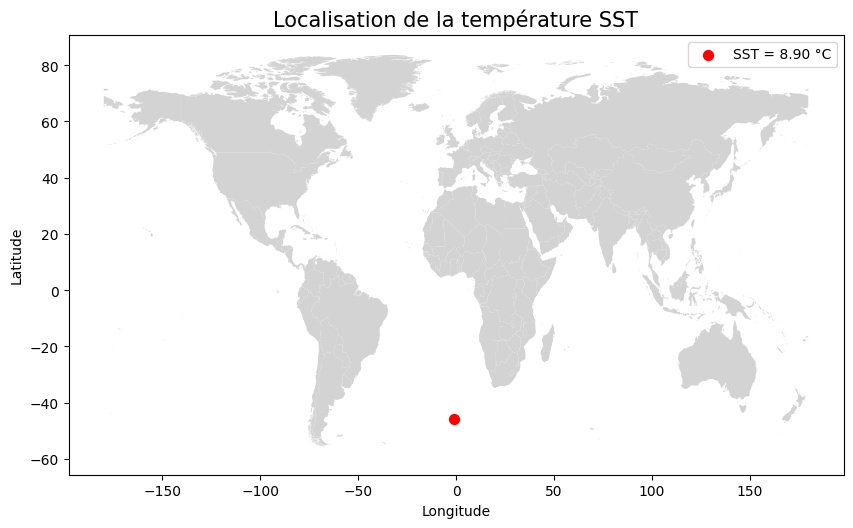

In [52]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

geometry = [Point(longitude, latitude)]
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")
world = gpd.read_file("../data/geojson/world.geojson")
france = world[world.name == "France"]
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer la carte du monde
world.plot(ax=ax, color='lightgrey')

# Ajouter le point spécifique à la carte
gdf.plot(ax=ax, color='red', marker='o', markersize=50, label=f"SST = {temperature:.2f} °C")

# Ajouter un titre et des labels
ax.set_title("Localisation de la température SST", fontsize=15)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Ajouter une légende
ax.legend()

# Afficher la carte
plt.show()


## Analyse temperature ocean

In [53]:
import copernicusmarine

copernicusmarine.subset(
    dataset_id="cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m",
    variables=["uo", "vo"],
    minimum_longitude=6.580047106607565,
    maximum_longitude=6.580047106607565,
    minimum_latitude=43.00676395127391,
    maximum_latitude=43.00676395127391,
    start_datetime="2024-06-01T00:00:00",
    end_datetime="2024-09-01T00:00:00",
    minimum_depth=0.49402499198913574,
    maximum_depth=0.49402499198913574,
)

INFO - 2025-04-05T16:05:28Z - Selected dataset version: "202406"
INFO - 2025-04-05T16:05:28Z - Selected dataset part: "default"
INFO - 2025-04-05T16:05:31Z - Starting download. Please wait...
100%|██████████| 4/4 [00:00<00:00,  7.27it/s]
INFO - 2025-04-05T16:05:32Z - Successfully downloaded to cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_uo-vo_6.58E_43.00N_0.49m_2024-06-01-2024-09-01.nc


ResponseSubset(file_path=PosixPath('cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_uo-vo_6.58E_43.00N_0.49m_2024-06-01-2024-09-01.nc'), output_directory=PosixPath('.'), filename='cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_uo-vo_6.58E_43.00N_0.49m_2024-06-01-2024-09-01.nc', file_size=0.013709923664122136, data_transfer_size=8.379603053435115, variables=['uo', 'vo'], coordinates_extent=[GeographicalExtent(minimum=6.583343505859375, maximum=6.583343505859375, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=43.0, maximum=43.0, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2024-06-01T00:00:00+00:00', maximum='2024-09-01T00:00:00+00:00', unit='iso8601', coordinate_id='time'), GeographicalExtent(minimum=0.49402499198913574, maximum=0.49402499198913574, unit='m', coordinate_id='depth')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [54]:
ds = xr.open_dataset("cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_uo-vo_6.58E_43.00N_0.49m_2024-06-01-2024-09-01.nc")
# Afficher les variables disponibles dans le dataset
print(ds)

<xarray.Dataset> Size: 2kB
Dimensions:    (depth: 1, latitude: 1, longitude: 1, time: 93)
Coordinates:
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 4B 43.0
  * longitude  (longitude) float32 4B 6.583
  * time       (time) datetime64[ns] 744B 2024-06-01 2024-06-02 ... 2024-09-01
Data variables:
    uo         (time, depth, latitude, longitude) float32 372B ...
    vo         (time, depth, latitude, longitude) float32 372B ...
Attributes:
    credit:                    E.U. Copernicus Marine Service Information (CM...
    references:                http://marine.copernicus.eu
    Conventions:               CF-1.8
    source:                    MOI GLO12
    contact:                   https://marine.copernicus.eu/contact
    title:                     daily mean fields from Global Ocean Physics An...
    producer:                  CMEMS - Global Monitoring and Forecasting Centre
    institution:               Mercator Ocean International
    copernicusmarine_v

In [55]:
ds.uo

<xarray.DataArray 'uo' (time: 93, depth: 1, latitude: 1, longitude: 1)> Size: 372B
[93 values with dtype=float32]
Coordinates:
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 4B 43.0
  * longitude  (longitude) float32 4B 6.583
  * time       (time) datetime64[ns] 744B 2024-06-01 2024-06-02 ... 2024-09-01
Attributes:
    standard_name:  eastward_sea_water_velocity
    unit_long:      Meters per second
    valid_max:      5.0
    units:          m s-1
    long_name:      Eastward velocity
    valid_min:      -5.0

In [56]:
ds = xr.open_dataset("../data/sst/recent_cmems.nc")
print(ds)

<xarray.Dataset> Size: 2kB
Dimensions:    (time: 93, depth: 1, latitude: 1, longitude: 1)
Coordinates:
  * time       (time) datetime64[ns] 744B 2024-06-01 2024-06-02 ... 2024-09-01
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 4B 43.08
  * longitude  (longitude) float32 4B 6.583
Data variables:
    uo         (time, depth, latitude, longitude) float32 372B ...
    vo         (time, depth, latitude, longitude) float32 372B ...
Attributes:
    Conventions:       CF-1.11
    title:             daily mean fields from Global Ocean Physics Analysis a...
    institution:       Mercator Ocean International
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    source:            MOI GLO12
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           https://marine.copernicus.eu/contact
    references:        http://marine.copernicus.eu
    subset:source:     ARCO data downloaded from the Marine Data Store usin

In [58]:
ds.uo

<xarray.DataArray 'uo' (time: 93, depth: 1, latitude: 1, longitude: 1)> Size: 372B
[93 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 744B 2024-06-01 2024-06-02 ... 2024-09-01
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 4B 43.08
  * longitude  (longitude) float32 4B 6.583
Attributes:
    units:          m s-1
    standard_name:  eastward_sea_water_velocity
    long_name:      Eastward velocity
    cell_methods:   area: mean
    unit_long:      Meters per second
    valid_max:      5.0
    valid_min:      -5.0

In [61]:
ds["vo"].isel(time=0)

<xarray.DataArray 'vo' (depth: 1, latitude: 1, longitude: 1)> Size: 4B
[1 values with dtype=float32]
Coordinates:
    time       datetime64[ns] 8B 2024-06-01
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 4B 43.08
  * longitude  (longitude) float32 4B 6.583
Attributes:
    units:          m s-1
    standard_name:  northward_sea_water_velocity
    long_name:      Northward velocity
    cell_methods:   area: mean
    unit_long:      Meters per second
    valid_max:      5.0
    valid_min:      -5.0

In [64]:
vo = ds["vo"].isel(time=0).values[0][0][0]  # Extraire la valeur de vo
vo

np.float32(-0.01186009)

In [72]:
vo = ds["vo"].isel(time=3).values  # Extraire la valeur de vo
vo

array([[[-0.21701871]]], dtype=float32)

# SST Again

In [75]:
import copernicusmarine

copernicusmarine.subset(
    dataset_id="METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2",
    variables=["analysed_sst"],
    minimum_longitude=6.580047106607565,
    maximum_longitude=6.580047106607565,
    minimum_latitude=43.00676395127391,
    maximum_latitude=43.00676395127391,
    start_datetime="2024-06-01T00:00:00",
    end_datetime="2024-09-01T00:00:00",
)

INFO - 2025-04-05T16:32:44Z - Selected dataset version: "default"
INFO - 2025-04-05T16:32:44Z - Selected dataset part: "default"
INFO - 2025-04-05T16:32:46Z - Starting download. Please wait...
100%|██████████| 2/2 [00:00<00:00,  8.19it/s]
INFO - 2025-04-05T16:32:47Z - Successfully downloaded to METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_6.57E_43.03N_2024-06-01-2024-09-01.nc


ResponseSubset(file_path=PosixPath('METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_6.57E_43.03N_2024-06-01-2024-09-01.nc'), output_directory=PosixPath('.'), filename='METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_6.57E_43.03N_2024-06-01-2024-09-01.nc', file_size=0.013177480916030535, data_transfer_size=4.865954198473283, variables=['analysed_sst'], coordinates_extent=[GeographicalExtent(minimum=6.574999809265137, maximum=6.574999809265137, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=43.025001525878906, maximum=43.025001525878906, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2024-06-01T00:00:00+00:00', maximum='2024-09-01T00:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [77]:
ds = xr.open_dataset("new_sst.nc")
ds

<xarray.Dataset> Size: 248MB
Dimensions:       (time: 366, latitude: 1838, longitude: 46)
Coordinates:
  * latitude      (latitude) float32 7kB -45.92 -45.88 -45.83 ... 45.88 45.92
  * longitude     (longitude) float32 184B -1.125 -1.075 -1.025 ... 1.075 1.125
  * time          (time) datetime64[ns] 3kB 2024-04-03 2024-04-04 ... 2025-04-03
Data variables:
    analysed_sst  (time, latitude, longitude) float64 248MB ...
Attributes:
    references:                Good S, Fiedler E, Mao C, Martin MJ, Maycock A...
    Conventions:               CF-1.4, ACDD-1.3
    source:                    AVHRR18_G-NAVO-L2P-V1.0, AVHRR19_G-NAVO-L2P-V1...
    comment:                   WARNING Some applications are unable to proper...
    title:                     Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 ...
    institution:               UKMO
    history:                   Created from sst.nc; obs_anal.nc; seaice.nc
    copernicusmarine_version:  2.0.1

In [83]:
uo = ds['analysed_sst'].isel(time=0).values
temperature_kelvin = uo[0][0]
temperature_celsius = temperature_kelvin - 273.15
temperature_celsius

np.float64(8.899993697553896)

In [84]:
uo_last = ds['analysed_sst'].isel(time=-1).values
temperature_kelvin_last = uo_last[0][0]
temperature_celsius_last = temperature_kelvin_last - 273.15
temperature_celsius_last

np.float64(7.219993735104822)